In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
train_x = train.drop(['Id', 'Label'], axis = 1)
train_y = train['Label']

test = test.drop('Id', axis = 1)

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

scalar = StandardScaler(with_std = False)
scalar.fit(X_train)
train_scaled = scalar.transform(X_train)
val_scaled = scalar.transform(X_val)
test_scaled = scalar.transform(test)

In [9]:
from sklearn.metrics import accuracy_score
pca = PCA(random_state = 42)
pca.fit(train_scaled)
X_train_transformed  = pca.transform(train_scaled)
X_val_transformed = pca.transform(val_scaled)
X_test_transformed = pca.transform(test_scaled)

83
90.2344871977032


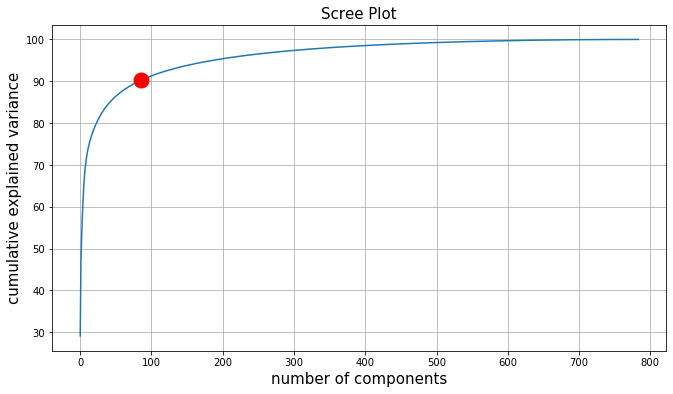

In [31]:
variance = pca.explained_variance_ratio_.cumsum()
for i in range(0,len(variance)):
  if(variance[i] > 0.90):
    print(i)
    break;

print('Variance explained by 85 components: ', variance[85]*100)

plt.figure(figsize = (11,6))
plt.plot(np.arange(0, 784), variance*100)
plt.plot(85, variance[85]*100, 'ro', ms = 15)
plt.xlabel('number of components', fontsize = 15)
plt.ylabel('cumulative explained variance', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid(True)

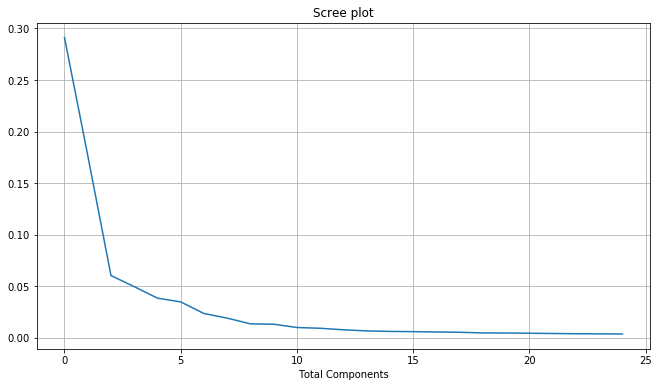

In [11]:
plt.figure(figsize = (11,6))
plt.plot(np.arange(0, 25), pca.explained_variance_ratio_[:25])
plt.xlabel('Total Components')
plt.title('Scree plot')
plt.grid(True)

In [12]:
#Random Forest
accuracy_list = []
time_list = []
def rfclass(d, n):
    clf = RandomForestClassifier(max_depth = d, n_estimators = n, random_state = 42)
    start = time.time()
    clf.fit(X_train_transformed[:,:85], y_train)
    end = time.time()
    y_pred = clf.predict(X_val_transformed[:,:85])
    accuracy = accuracy_score(y_val, y_pred)
    #print(accuracy)
    #print(end-start)
    return (accuracy, end-start) 

max_depth = [3,5,7,9,11]
n_estimators = [50,100,150,200,250]

a_d = {}
t_d = {}
for depth in max_depth:
    accuracy_list = []
    time_list = []
    for n_e in n_estimators:
        a,t = rfclass(depth, n_e)
        accuracy_list.append(a)
        time_list.append(t)
    a_d[depth] = accuracy_list
    t_d[depth] = time_list

In [13]:
import pandas as pd
pd.DataFrame(a_d)

,3,5,7,9,11
0,0.601833,0.691000,0.747667,0.777667,0.810833
1,0.613833,0.689000,0.748500,0.773167,0.812333
2,0.623833,0.691500,0.748667,0.775167,0.812833
3,0.630833,0.695333,0.749167,0.776333,0.814833
4,0.629500,0.696333,0.750000,0.777167,0.813833


In [14]:
pd.DataFrame(t_d)

,3,5,7,9,11
0,7.547820,11.244939,14.074400,17.218939,20.418440
1,16.276513,23.567022,29.449270,34.402002,46.117820
2,20.636871,34.818941,42.455525,51.724692,66.284755
3,28.731162,43.071878,58.586375,69.785476,89.346154
4,34.029027,56.805439,70.495510,87.800274,110.330015


In [18]:
clf = RandomForestClassifier(max_depth = 15, n_estimators = 50, random_state = 42)
start = time.time()
clf.fit(X_train_transformed[:,:23], y_train)
end = time.time()
y_t_pred = clf.predict(X_train_transformed[:,:23]) 
training_accuracy = accuracy_score(y_train, y_t_pred)
print('Training Time: ', end-start)
print('Training Accuracy: ', training_accuracy)

start = time.time()
y_pred = clf.predict(X_val_transformed[:,:23])
end = time.time()
accuracy = accuracy_score(y_val, y_pred)
print('Testing Time: ', end-start)
print('Validation Accuracy: ', accuracy)

Training Time:  12.093667984008789
Training Accuracy:  0.9557962962962963
Testing Time:  0.059839487075805664
Validation Accuracy:  0.863


In [19]:
clf = RandomForestClassifier(max_depth = 30, n_estimators = 50, random_state = 42)
start = time.time()
clf.fit(X_train_transformed[:,:23], y_train)
end = time.time()
y_t_pred = clf.predict(X_train_transformed[:,:23]) 
training_accuracy = accuracy_score(y_train, y_t_pred)
print('Training Time: ', end-start)
print('Training Accuracy: ', training_accuracy)

start = time.time()
y_pred = clf.predict(X_val_transformed[:,:23])
end = time.time()
accuracy = accuracy_score(y_val, y_pred)
print('Testing Time: ', end-start)
print('Validation Accuracy: ', accuracy)

Training Time:  12.730020999908447
Training Accuracy:  0.9999444444444444
Testing Time:  0.07480001449584961
Validation Accuracy:  0.8735


In [23]:
clf = RandomForestClassifier(max_depth = 30, n_estimators = 200, random_state = 42)
start = time.time()
clf.fit(X_train_transformed[:,:23], y_train)
end = time.time()
y_t_pred = clf.predict(X_train_transformed[:,:23]) 
training_accuracy = accuracy_score(y_train, y_t_pred)
print('Training Time: ', end-start)
print('Training Accuracy: ', training_accuracy)

start = time.time()
y_pred = clf.predict(X_val_transformed[:,:23])
end = time.time()
accuracy = accuracy_score(y_val, y_pred)
print('Testing Time: ', end-start)
print('Validation Accuracy: ', accuracy)

Training Time:  52.23238825798035
Training Accuracy:  1.0
Testing Time:  0.3251307010650635
Validation Accuracy:  0.8781666666666667


In [22]:
clf = RandomForestClassifier(max_depth = 50, n_estimators = 200, random_state = 42)
start = time.time()
clf.fit(X_train_transformed[:,:23], y_train)
end = time.time()
y_t_pred = clf.predict(X_train_transformed[:,:23]) 
training_accuracy = accuracy_score(y_train, y_t_pred)
print('Training Time: ', end-start)
print('Training Accuracy: ', training_accuracy)

start = time.time()
y_pred = clf.predict(X_val_transformed[:,:23])
end = time.time()
accuracy = accuracy_score(y_val, y_pred)
print('Testing Time: ', end-start)
print('Validation Accuracy: ', accuracy)

Training Time:  50.937859535217285
Training Accuracy:  1.0
Testing Time:  0.32111310958862305
Validation Accuracy:  0.876


In [25]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

yhat_classes = y_pred
yhat_probs = clf.predict_proba(X_val_transformed[:,:23])

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val, yhat_classes, average = 'micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val, yhat_classes, average = 'micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, yhat_classes, average = 'micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_val, yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_val, yhat_probs, multi_class = 'ovr')
print('ROC AUC: %f' % auc)

# Confusion Matrix
matrix = multilabel_confusion_matrix(y_val, yhat_classes, labels = [0,1,2,3,4])
print(matrix)

#Reference:
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

Accuracy: 0.878167
Precision: 0.878167
Recall: 0.878167
F1 score: 0.878167
Cohens kappa: 0.847692
ROC AUC: 0.984929
[[[4740   70]
  [  74 1116]]

 [[4598  172]
  [ 164 1066]]

 [[4611  207]
  [ 225  957]]

 [[4649  176]
  [ 169 1006]]

 [[4671  106]
  [  99 1124]]]


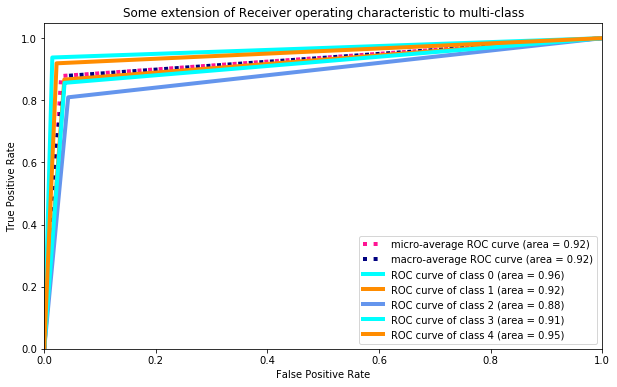

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
n_classes = 5

y_val = label_binarize(y_val, classes = [0,1,2,3,4])
y_pred = label_binarize(y_pred, classes = [0,1,2,3,4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

import itertools
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (10,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()